In [1]:
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import cifar10
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  

In [2]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

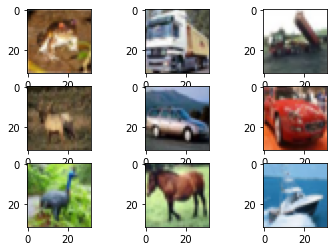

In [7]:
for i in range (9):
  plt.subplot(330 +i +1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [9]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [10]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

Epoch 1/500
313/313 [==============================] - 6s 6ms/step - loss: 2.1463 - accuracy: 0.2337 - val_loss: 1.8833 - val_accuracy: 0.3224
Epoch 2/500
313/313 [==============================] - 2s 6ms/step - loss: 1.8924 - accuracy: 0.3133 - val_loss: 1.7926 - val_accuracy: 0.3467
Epoch 3/500
313/313 [==============================] - 2s 5ms/step - loss: 1.8260 - accuracy: 0.3426 - val_loss: 1.8641 - val_accuracy: 0.3325
Epoch 4/500
313/313 [==============================] - 2s 6ms/step - loss: 1.7735 - accuracy: 0.3602 - val_loss: 1.7248 - val_accuracy: 0.3797
Epoch 5/500
313/313 [==============================] - 2s 5ms/step - loss: 1.7401 - accuracy: 0.3733 - val_loss: 1.7447 - val_accuracy: 0.3702
Epoch 6/500
313/313 [==============================] - 2s 6ms/step - loss: 1.7095 - accuracy: 0.3848 - val_loss: 1.7047 - val_accuracy: 0.3914
Epoch 7/500
313/313 [==============================] - 2s 6ms/step - loss: 1.6897 - accuracy: 0.3926 - val_loss: 1.7013 - val_accuracy: 0.3877

Test loss:  1.4945648908615112
Test accuracy:  0.4860000014305115


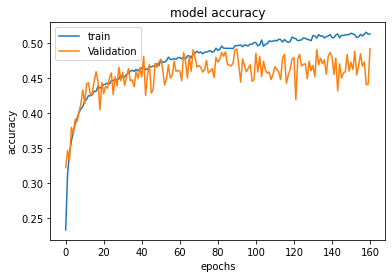

In [11]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('cifar10.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-24 08:55:16--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-24 08:55:17 (32.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/cifar10.ipynb to pdf
[NbConvertApp] Support files will be in cifar10_files/
[NbConvertApp] Making directory ./cifar10_files
[NbConvertApp] Making directory ./cifar10_files
[NbCo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'